In [1]:
# Importação de Bibliotecas 
from arquivo_preprocessado import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ("ignore")


In [2]:
# Importação dos dados tratados em arquivo python
X_train , X_test , y_train, y_test = preprocessing()

In [3]:
X_train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
34869,1576,40,27.34964,16,True,False,False,True,False,True,False,False,True,False
65369,1297,40,25.00000,15,True,False,False,True,False,True,False,False,True,False
47471,916,25,16.00000,18,True,False,False,True,False,True,False,False,True,False
22360,2542,15,35.00000,9,True,False,False,True,False,True,False,False,True,False
22709,1478,20,12.00000,7,False,True,True,False,False,True,False,False,True,False


In [4]:
# Função de normalização de atributos com desvio padrão -1 a 1, evitar pesos maiores de atributos.
def normalizacao(X_train, X_test):
    scaler = StandardScaler()
    scaler_fit = scaler.fit(X_train)
    X_train_norm = scaler_fit.transform(X_train)
    X_test_norm = scaler_fit.transform(X_test)
    return X_train_norm , X_test_norm, scaler_fit

In [5]:
# Chamada da função de normalização de variáveis
X_train_norm ,X_test_norm, scaler = normalizacao(X_train, X_test)

In [6]:
X_train_norm

array([[ 0.20664056,  0.91058414, -0.10846993, ..., -0.65731231,
         1.00372073, -0.50023738],
       [-0.12158302,  0.91058414, -0.3079786 , ..., -0.65731231,
         1.00372073, -0.50023738],
       [-0.56980232, -0.05429354, -1.07217154, ..., -0.65731231,
         1.00372073, -0.50023738],
       ...,
       [-0.0180573 ,  0.91058414,  1.30531761, ...,  1.52134684,
        -0.99629306, -0.50023738],
       [ 2.07480919, -1.34079711,  2.57897252, ..., -0.65731231,
        -0.99629306,  1.99905094],
       [ 0.45369057,  0.91058414,  1.72986925, ...,  1.52134684,
        -0.99629306, -0.50023738]])

In [7]:
# Seleção de modelos com configuração padrão
def selecao(X_train , X_test , Y_train , Y_test): 
    X_rank = np.concatenate([X_train, X_test])
    Y_rank = np.concatenate([Y_train, Y_test])
    for model in [RandomForestClassifier,GradientBoostingClassifier,CatBoostClassifier]:
      cls = model()
      kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=7 )
      s = cross_val_score(cls, X_rank, Y_rank, scoring="accuracy", cv=kfold)
      print(f"{model.__name__:22} Score: "f"{s.mean():.3f} STD: {s.std():.2f}")

In [8]:
# Chamada da função de seleção de modelos
print(" Seleção de modelos:")
selecao (X_train_norm, X_test_norm, y_train, y_test)

 Seleção de modelos:
RandomForestClassifier Score: 0.837 STD: 0.00
GradientBoostingClassifier Score: 0.861 STD: 0.00
Learning rate set to 0.098348
0:	learn: 0.9818518	total: 171ms	remaining: 2m 50s
1:	learn: 0.8917853	total: 189ms	remaining: 1m 34s
2:	learn: 0.8211410	total: 206ms	remaining: 1m 8s
3:	learn: 0.7635114	total: 223ms	remaining: 55.6s
4:	learn: 0.7151782	total: 240ms	remaining: 47.8s
5:	learn: 0.6753028	total: 256ms	remaining: 42.4s
6:	learn: 0.6394439	total: 272ms	remaining: 38.6s
7:	learn: 0.6113001	total: 288ms	remaining: 35.7s
8:	learn: 0.5869311	total: 305ms	remaining: 33.6s
9:	learn: 0.5638113	total: 320ms	remaining: 31.7s
10:	learn: 0.5453702	total: 335ms	remaining: 30.1s
11:	learn: 0.5292854	total: 351ms	remaining: 28.9s
12:	learn: 0.5154360	total: 366ms	remaining: 27.8s
13:	learn: 0.5035053	total: 382ms	remaining: 26.9s
14:	learn: 0.4910652	total: 401ms	remaining: 26.3s
15:	learn: 0.4816441	total: 418ms	remaining: 25.7s
16:	learn: 0.4727205	total: 435ms	remaining: 

In [10]:
# Otimização de hiperparâmetros utilizando GridSearchCV
def modelo (x_train , y_train):
   param_grid = {
    'random_state': [20],
    'depth': [10,12],
    'learning_rate': [0.1,0,5],
    'leaf_estimation_iterations': [10],
    'iterations': [1000],
   }
   cat = CatBoostClassifier()
   Skfold = StratifiedKFold(n_splits=5,shuffle=True)
   grid_search = GridSearchCV(estimator = cat, param_grid = param_grid, 
                           cv = Skfold, n_jobs = -1, verbose = 3, return_train_score=True, scoring='accuracy')
   grid_search.fit(x_train, y_train)
   return grid_search

In [11]:
y_train.shape

(71086, 1)

In [12]:
X_train_norm.shape

(71086, 14)

In [13]:
# Chamada da função de otimização de hiperparâmetros
modelo = modelo (X_train_norm,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0:	learn: 0.9226511	total: 443ms	remaining: 7m 22s
1:	learn: 0.7927352	total: 739ms	remaining: 6m 8s
2:	learn: 0.6910926	total: 998ms	remaining: 5m 31s
3:	learn: 0.6192064	total: 1.25s	remaining: 5m 10s
4:	learn: 0.5698125	total: 1.34s	remaining: 4m 27s
5:	learn: 0.5316009	total: 1.58s	remaining: 4m 21s
6:	learn: 0.5033212	total: 1.79s	remaining: 4m 14s
7:	learn: 0.4792384	total: 2s	remaining: 4m 8s
8:	learn: 0.4622272	total: 2.21s	remaining: 4m 2s
9:	learn: 0.4530298	total: 2.25s	remaining: 3m 42s
10:	learn: 0.4432333	total: 2.48s	remaining: 3m 42s
11:	learn: 0.4338380	total: 2.7s	remaining: 3m 42s
12:	learn: 0.4262426	total: 2.94s	remaining: 3m 42s
13:	learn: 0.4208078	total: 3.17s	remaining: 3m 42s
14:	learn: 0.4163260	total: 3.4s	remaining: 3m 43s
15:	learn: 0.4089455	total: 3.64s	remaining: 3m 44s
16:	learn: 0.4067459	total: 3.88s	remaining: 3m 44s
17:	learn: 0.4041710	total: 4.12s	remaining: 3m 45s
18:	learn: 0.4023425	t

In [16]:
# salvar modelo
import pickle
# salvar o modelo catboost agro_model.pkl
with open('agro_model.pkl', 'wb') as file:
    pickle.dump(modelo, file)

In [17]:
resultado = modelo.cv_results_
resultado

{'mean_fit_time': array([9.23714186e+02, 5.99809885e-01, 9.11137731e+02, 2.84555678e+03,
        9.24793339e-01, 2.03049348e+03]),
 'std_fit_time': array([1.19547408e+01, 1.10807569e-01, 1.20762845e+01, 1.92767430e+01,
        6.08890636e-02, 6.99080017e+02]),
 'mean_score_time': array([0.6749784 , 0.        , 0.60569258, 0.65997963, 0.        ,
        0.29821277]),
 'std_score_time': array([0.14561667, 0.        , 0.03631715, 0.07225371, 0.        ,
        0.10505192]),
 'param_depth': masked_array(data=[10, 10, 10, 12, 12, 12],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_iterations': masked_array(data=[1000, 1000, 1000, 1000, 1000, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_leaf_estimation_iterations': masked_array(data=[10, 10, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False],
        fil

In [14]:
# Demonstração dos resultados de otimização do GridSearchCV
resultado = modelo.cv_results_
mean = float (resultado['mean_test_score'])
dv = float (resultado['std_test_score'])
print(" Resultados Treinamento: " )
print("\n Resultados:\n", modelo.cv_results_   )
print("\n A melhor pontuação:\n", modelo.best_score_)
print('\n Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
print("\n Os melhores parâmetros:\n", modelo.best_params_)

TypeError: only length-1 arrays can be converted to Python scalars

In [18]:
# Função das métricas de avaliação do modelo
def metrica(y_test):
    yhat = modelo.predict(X_test)
    Acuracia = accuracy_score(y_test,yhat)
    Matrix = confusion_matrix(y_test,yhat)
    Report = classification_report(y_test,yhat)
    return Acuracia , Matrix , Report

In [19]:
# Chamada de função de avaliação
Acuracia , Matrix, Report = metrica (y_test)

In [20]:
print("Acurácia:", Acuracia)
print("Matrix de Confusão:\n", Matrix)
print("Relatório de Classificação:\n", Report)

Acurácia: 0.7338510015755121
Matrix de Confusão:
 [[12865    89  1894]
 [ 1885     6   570]
 [  290     2   171]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     14848
           1       0.06      0.00      0.00      2461
           2       0.06      0.37      0.11       463

    accuracy                           0.73     17772
   macro avg       0.33      0.41      0.33     17772
weighted avg       0.72      0.73      0.72     17772



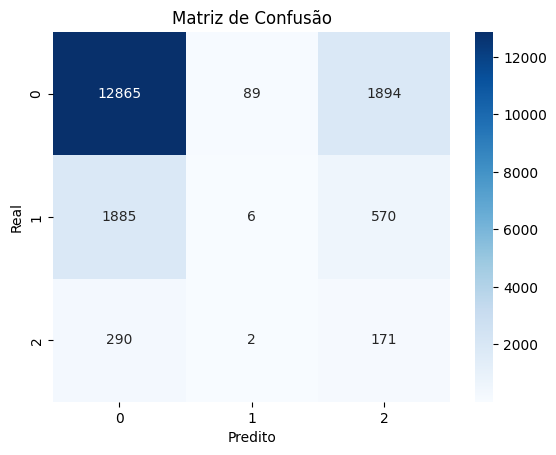

In [21]:
sns.heatmap(Matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Claramente nota ser necessário ser realizado um trabalho de engenharia de recurso de balanceamento de target para obter melhor métrica para as classes de menor quantidade e outra abordagem com valores nulos
 